In [17]:
#!pip install python-resize-image

In [2]:
#! pip install tensorflow

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2
from skimage import color
from PIL import Image
import imageio
from resizeimage import resizeimage
import os



In [28]:
df = pd.read_csv('/Users/butler/Documents/springboard_bootcamp/Classification_of_Indian_clothing_images/data/interim/test_one_hot.csv')

In [29]:
df.head()

,Unnamed: 0,image_path,dhoti_pants,saree,sherwanis,palazzos,nehru_jackets,petticoats,blouse,dupattas,gowns,lehenga,women_kurta,kurta_men,mojaris_men,mojaris_women,leggings_and_salwars
0,0,images/test/0.jpeg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,images/test/1.jpeg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,images/test/2.jpeg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,images/test/3.jpeg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,images/test/4.jpeg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
image_path = df.image_path
image_path

0          images/test/0.jpeg
1          images/test/1.jpeg
2          images/test/2.jpeg
3          images/test/3.jpeg
4          images/test/4.jpeg
                ...          
6741    images/test/7495.jpeg
6742    images/test/7496.jpeg
6743    images/test/7497.jpeg
6744    images/test/7498.jpeg
6745    images/test/7499.jpeg
Name: image_path, Length: 6746, dtype: object

In [32]:
len(image_path)

6746

In [33]:
image_path[0]

'images/test/0.jpeg'

Resizing test images and making them grayscale

In [34]:
direct = '/Users/butler/Documents/springboard_bootcamp/Classification_of_Indian_clothing_images/data/raw/'

In [35]:
direct1 = '/Users/butler/Documents/springboard_bootcamp/Classification_of_Indian_clothing_images/data/interim/resized_70_gray/test'

In [37]:
for i in range(len(image_path)):
    path = os.path.join(direct, image_path[i])

    img = Image.open(path)
        
    img = resizeimage.resize_contain(img, [70, 70])
    img = img.convert('L')
    
    img.save(direct, image_path[i])
#plt.imshow(img)


KeyError: 'IMAGES/TEST/0.JPEG'

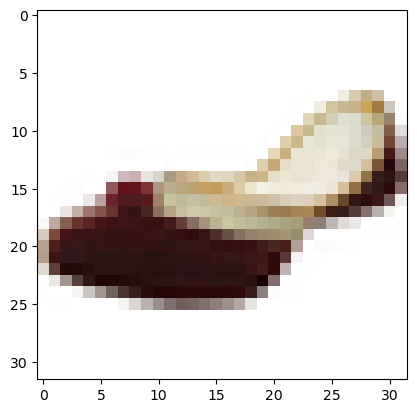

In [23]:
img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [32, 32])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_60000_resized-image.jpg', img.format)
plt.imshow(img)

In [ ]:
img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/0.jpeg')
img.shape

In [ ]:
img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [256, 256])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_60000_resized-image.jpg', img.format)
plt.imshow(img)

In [ ]:
img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/0.jpeg')
img.shape

In [ ]:
plt.imshow(img)

In [ ]:

img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/0.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [256, 256])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_0_resized-image.jpg', img.format)



In [ ]:
plt.imshow(img)

In [ ]:
img = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/20000.jpeg')
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
img = Image.open('/kaggle/input/indo-fashion-dataset/images/train/20000.jpeg')
    # resize image (contain)
img = resizeimage.resize_contain(img, [256, 256])
    # covert to RBA incase it's RGBA
img = img.convert("RGB")
#img.save('/content/images/train_20000_resized-image.jpg', img.format)


In [ ]:
plt.imshow(img)

In [29]:
df_train = pd.get_dummies(data=df_train, columns=['class_label'])

In [30]:
df_train.head()

,image_path,class_label_blouse,class_label_dhoti_pants,class_label_dupattas,class_label_gowns,class_label_kurta_men,class_label_leggings_and_salwars,class_label_lehenga,class_label_mojaris_men,class_label_mojaris_women,class_label_nehru_jackets,class_label_palazzos,class_label_petticoats,class_label_saree,class_label_sherwanis,class_label_women_kurta
0,images/train/0.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,images/train/1.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,images/train/2.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,images/train/3.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,images/train/4.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
df_val = pd.get_dummies(data=df_val, columns=['class_label'])

In [32]:
df_val.head()

,image_path,class_label_blouse,class_label_dhoti_pants,class_label_dupattas,class_label_gowns,class_label_kurta_men,class_label_leggings_and_salwars,class_label_lehenga,class_label_mojaris_men,class_label_mojaris_women,class_label_nehru_jackets,class_label_palazzos,class_label_petticoats,class_label_saree,class_label_sherwanis,class_label_women_kurta
0,images/val/0.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,images/val/1.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,images/val/2.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,images/val/3.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,images/val/4.jpeg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
df_test = pd.get_dummies(data=df_test, columns=['class_label'])

In [34]:
df_train.columns

Index(['image_path', 'class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta'],
      dtype='object')

In [ ]:
#resized_imgs = []
#for i in range(len(df_train)):
  #img = Image.open(f'/content/images/train/{i}.jpeg')
  #img = resizeimage.resize_contain(img, [256, 256])
  #img = img.convert("RGB")
  #resized_imgs.append(img)
# requires too much ram

In [ ]:
#train_datagen=ImageDataGenerator(rescale=1./255)
#train_generator=datagen.flow_from_dataframe(dataframe=df_train, directory='/content', x_col='image_path', y_col='class_label', class_mode='categorical', target_size=(32,32), batch_size=32, seed=26, save_to_dir='/content/drive/My Drive/capstone_3/preprocessed_data', )

In [35]:
# Creating generator images sizes 256 x 256
columns = ['class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta']
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(256,256), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

KeyboardInterrupt: 

In [ ]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=df_val, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(256,256), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

In [ ]:
# most of code is from https://saturncloud.io/blog/how-to-handle-different-image-sizes-in-tensorflow-cnn-training/#:~:text=Solution%202%3A%20Use%20Variable%20Input,keras.
# Thursday, July 06, 2023

#def resize_image(image, size=(256, 256)):
    #return tf.image.resize(image, size)

#train_dataset = tf.data.Dataset.list_files('/content/images/train/*.jpg')
#train_dataset = train_dataset.map(lambda x: tf.io.read_file(x))

#train_dataset = train_dataset.map(lambda x: tf.image.decode_jpeg(x, channels=3))

# Apply resizing to dataset
#train_dataset = train_dataset.map(lambda x: resize_image(x, size=(256, 256)))

#val_dataset = tf.data.Dataset.list_files('/content/images/val/*.jpg')
#val_dataset = val_dataset.map(lambda x: tf.io.read_file(x))

#val_dataset = val_dataset.map(lambda x: tf.image.decode_jpeg(x, channels=3))

#val_dataset = val_dataset.map(lambda x: resize_image(x, size=(256, 256)))

In [ ]:
# Setting up model
img_width, img_height = 256, 256

train_data = train_generator
val_data = val_generator
nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 50
batch_size = 16



input_shape = (img_width, img_height, 3)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(15))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(
    x=train_generator,
    y=None,
    validation_data=val_generator,
    epochs=5,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=3,
    validation_batch_size=batch_size,
    validation_freq=4,
    max_queue_size=10,
    use_multiprocessing=True,
    workers=6)



Now trying smaller images

In [30]:
# Creating generator for 32 x 32 sized images
columns = ['class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta']
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(32,32), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 91166 validated image filenames.


In [31]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=df_val, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(32,32), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 7500 validated image filenames.


In [32]:
# Setting up model
img_width, img_height = 32, 32

train_data = train_generator
val_data = val_generator
nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 50
batch_size = 16



input_shape = (img_width, img_height, 3)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(15))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [33]:
model.fit(
    x=train_generator,
    y=None,
    validation_data=val_generator,
    epochs=50,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=3,
    validation_batch_size=batch_size,
    validation_freq=4,
    max_queue_size=10,
    use_multiprocessing=True,
    workers=6)



Epoch 1/50
2849/2849 [==============================] - 217s 74ms/step - loss: 1.3831 - accuracy: 0.5580
Epoch 2/50
2849/2849 [==============================] - 198s 69ms/step - loss: 1.0064 - accuracy: 0.6766
Epoch 3/50
2849/2849 [==============================] - 197s 69ms/step - loss: 0.9100 - accuracy: 0.7082
Epoch 4/50
2849/2849 [==============================] - 197s 69ms/step - loss: 0.8566 - accuracy: 0.7253 - val_loss: 0.7467 - val_accuracy: 0.7083
Epoch 5/50
1783/2849 [=================>............] - ETA: 1:19 - loss: 0.8175 - accuracy: 0.7386

UnknownError: Graph execution error:

2 root error(s) found.
  (0) UNKNOWN:  OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")
OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 902, in wrapped_generator
    for data in generator_fn():

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 870, in get
    raise e

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 861, in get
    inputs = self.queue.get(block=True, timeout=5).get()

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 774, in get
    raise self._value

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))

  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")

OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))
  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")
OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'
"""


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/conda/lib/python3.10/site-packages/keras/engine/data_adapter.py", line 902, in wrapped_generator
    for data in generator_fn():

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 870, in get
    raise e

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 861, in get
    inputs = self.queue.get(block=True, timeout=5).get()

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 774, in get
    raise self._value

  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))

  File "/opt/conda/lib/python3.10/site-packages/keras/utils/data_utils.py", line 647, in get_index
    return _SHARED_SEQUENCES[uid][i]

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py", line 399, in _get_batches_of_transformed_samples
    img.save(os.path.join(self.save_to_dir, fname))

  File "/opt/conda/lib/python3.10/site-packages/PIL/Image.py", line 2429, in save
    fp = builtins.open(filename, "w+b")

OSError: [Errno 28] No space left on device: '/kaggle/working/_30684_5908004.png'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1414]

In [36]:
# Creating generator for 64 x 64 sized images
columns = ['class_label_blouse', 'class_label_dhoti_pants',
       'class_label_dupattas', 'class_label_gowns', 'class_label_kurta_men',
       'class_label_leggings_and_salwars', 'class_label_lehenga',
       'class_label_mojaris_men', 'class_label_mojaris_women',
       'class_label_nehru_jackets', 'class_label_palazzos',
       'class_label_petticoats', 'class_label_saree', 'class_label_sherwanis',
       'class_label_women_kurta']
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(64,64), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 91166 validated image filenames.


In [37]:
val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=df_val, directory='/kaggle/input/indo-fashion-dataset', x_col='image_path', y_col=columns, target_size=(64,64), batch_size=32, seed=26, save_to_dir='/kaggle/working', class_mode='raw')

Found 7500 validated image filenames.


In [38]:
# Setting up model
img_width, img_height = 64, 64

train_data = train_generator
val_data = val_generator
nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 50
batch_size = 16



input_shape = (img_width, img_height, 3)



model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(15))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
model.fit(
    x=train_generator,
    y=None,
    validation_data=val_generator,
    epochs=10,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=3,
    validation_batch_size=batch_size,
    validation_freq=4,
    max_queue_size=10,
    use_multiprocessing=True,
    workers=6)



Epoch 1/10
2849/2849 [==============================] - 221s 73ms/step - loss: 1.2183 - accuracy: 0.6116
Epoch 2/10
2849/2849 [==============================] - 191s 67ms/step - loss: 0.8781 - accuracy: 0.7171
Epoch 3/10
2849/2849 [==============================] - 195s 68ms/step - loss: 0.7809 - accuracy: 0.7487
Epoch 4/10
2849/2849 [==============================] - 198s 69ms/step - loss: 0.7188 - accuracy: 0.7681 - val_loss: 0.5665 - val_accuracy: 0.8021
Epoch 5/10
2849/2849 [==============================] - 198s 69ms/step - loss: 0.6755 - accuracy: 0.7809
Epoch 6/10
2849/2849 [==============================] - 200s 70ms/step - loss: 0.6419 - accuracy: 0.7899
Epoch 7/10
2849/2849 [==============================] - 198s 69ms/step - loss: 0.6160 - accuracy: 0.7993
Epoch 8/10
2849/2849 [==============================] - 200s 70ms/step - loss: 0.5875 - accuracy: 0.8066 - val_loss: 0.5409 - val_accuracy: 0.8646
Epoch 9/10
2849/2849 [==============================] - 196s 69ms/step - los

In [44]:
inputs = model.input
outputs = [model.layers[i].output for i in range(2,len(model.layers))]
mod = Model(inputs, outputs)

In [2]:
#image = imageio.imread('/kaggle/input/indo-fashion-dataset/images/train/60000.jpeg')

In [3]:
#all_layers_predictions = mod.predict(image)

In [ ]:
image1_channel8_fromlayer10 = all_layers_predictions[10][1,:,:,8]